In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()

In [2]:
data = pd.read_csv('results.csv')
data['efficiency'] = data['speedup'] / data['nthreads']
data

,serial,thread,speedup,nthreads,efficiency
0,398.352,398.148,1.00,1,1.000000
1,353.570,177.482,1.99,2,0.995000
2,433.856,268.096,1.62,3,0.540000
3,350.998,146.103,2.40,4,0.600000
4,434.624,181.391,2.40,5,0.480000
...,...,...,...,...,...
3195,349.885,51.573,6.78,28,0.242143
3196,356.309,52.805,6.75,29,0.232759
3197,319.653,47.914,6.67,30,0.222333
3198,319.244,49.216,6.49,31,0.209355


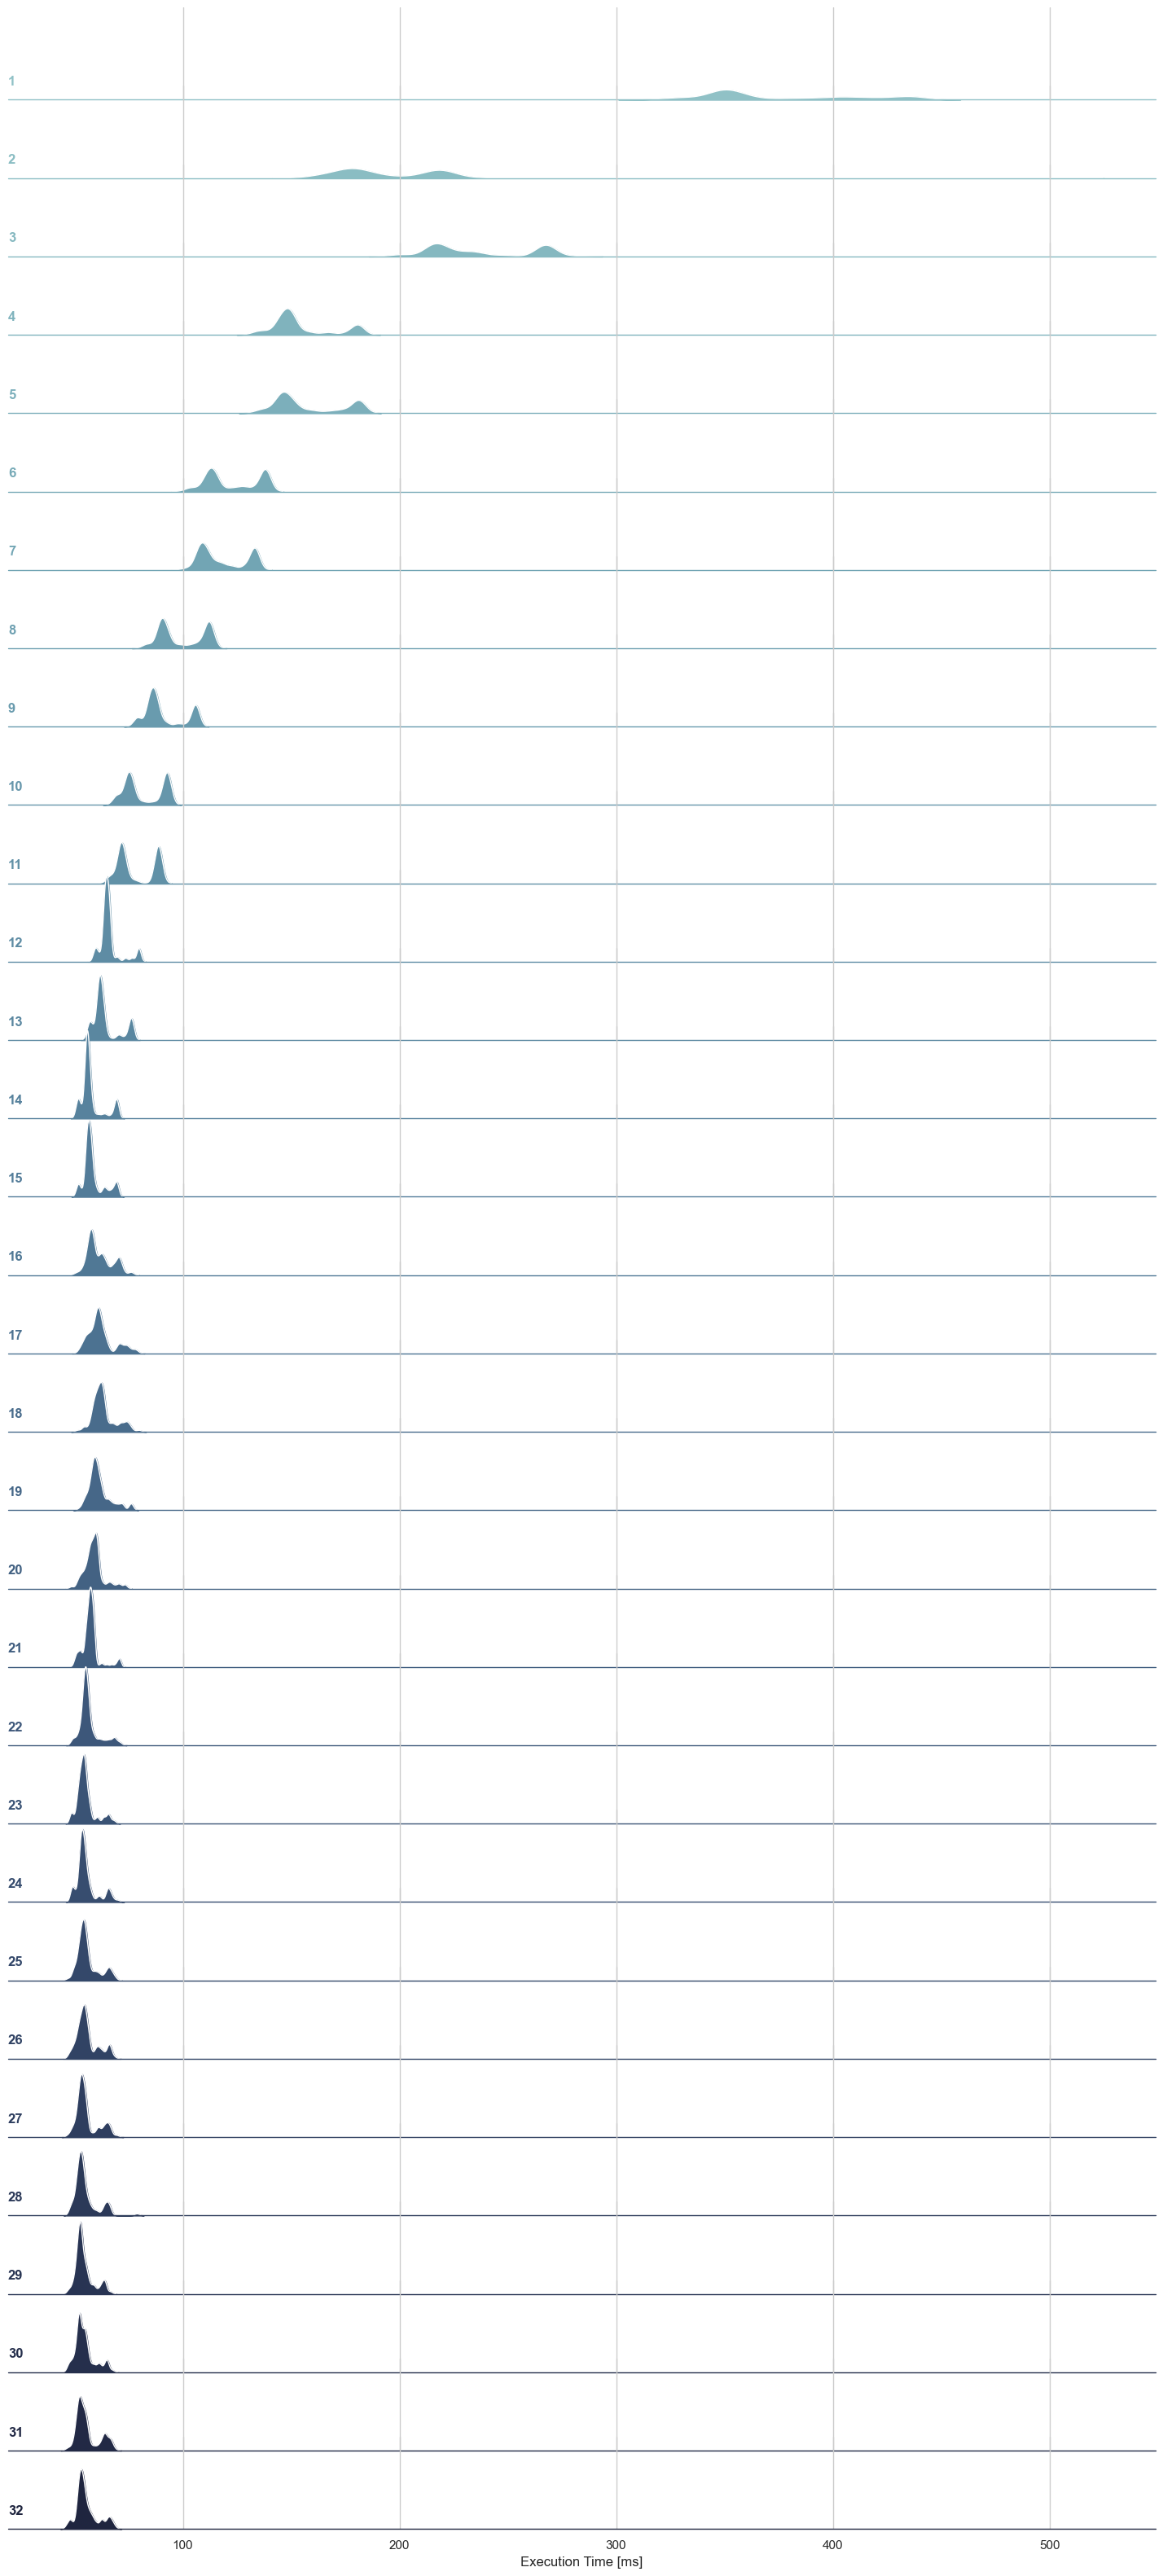

In [3]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0), "figure.figsize": (18, 12)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="nthreads", hue="nthreads", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "thread", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "thread", clip_on=False, color="w", lw=1, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)


g.map(label, "thread")
g.set_xlabels("Execution Time [ms]")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.15)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


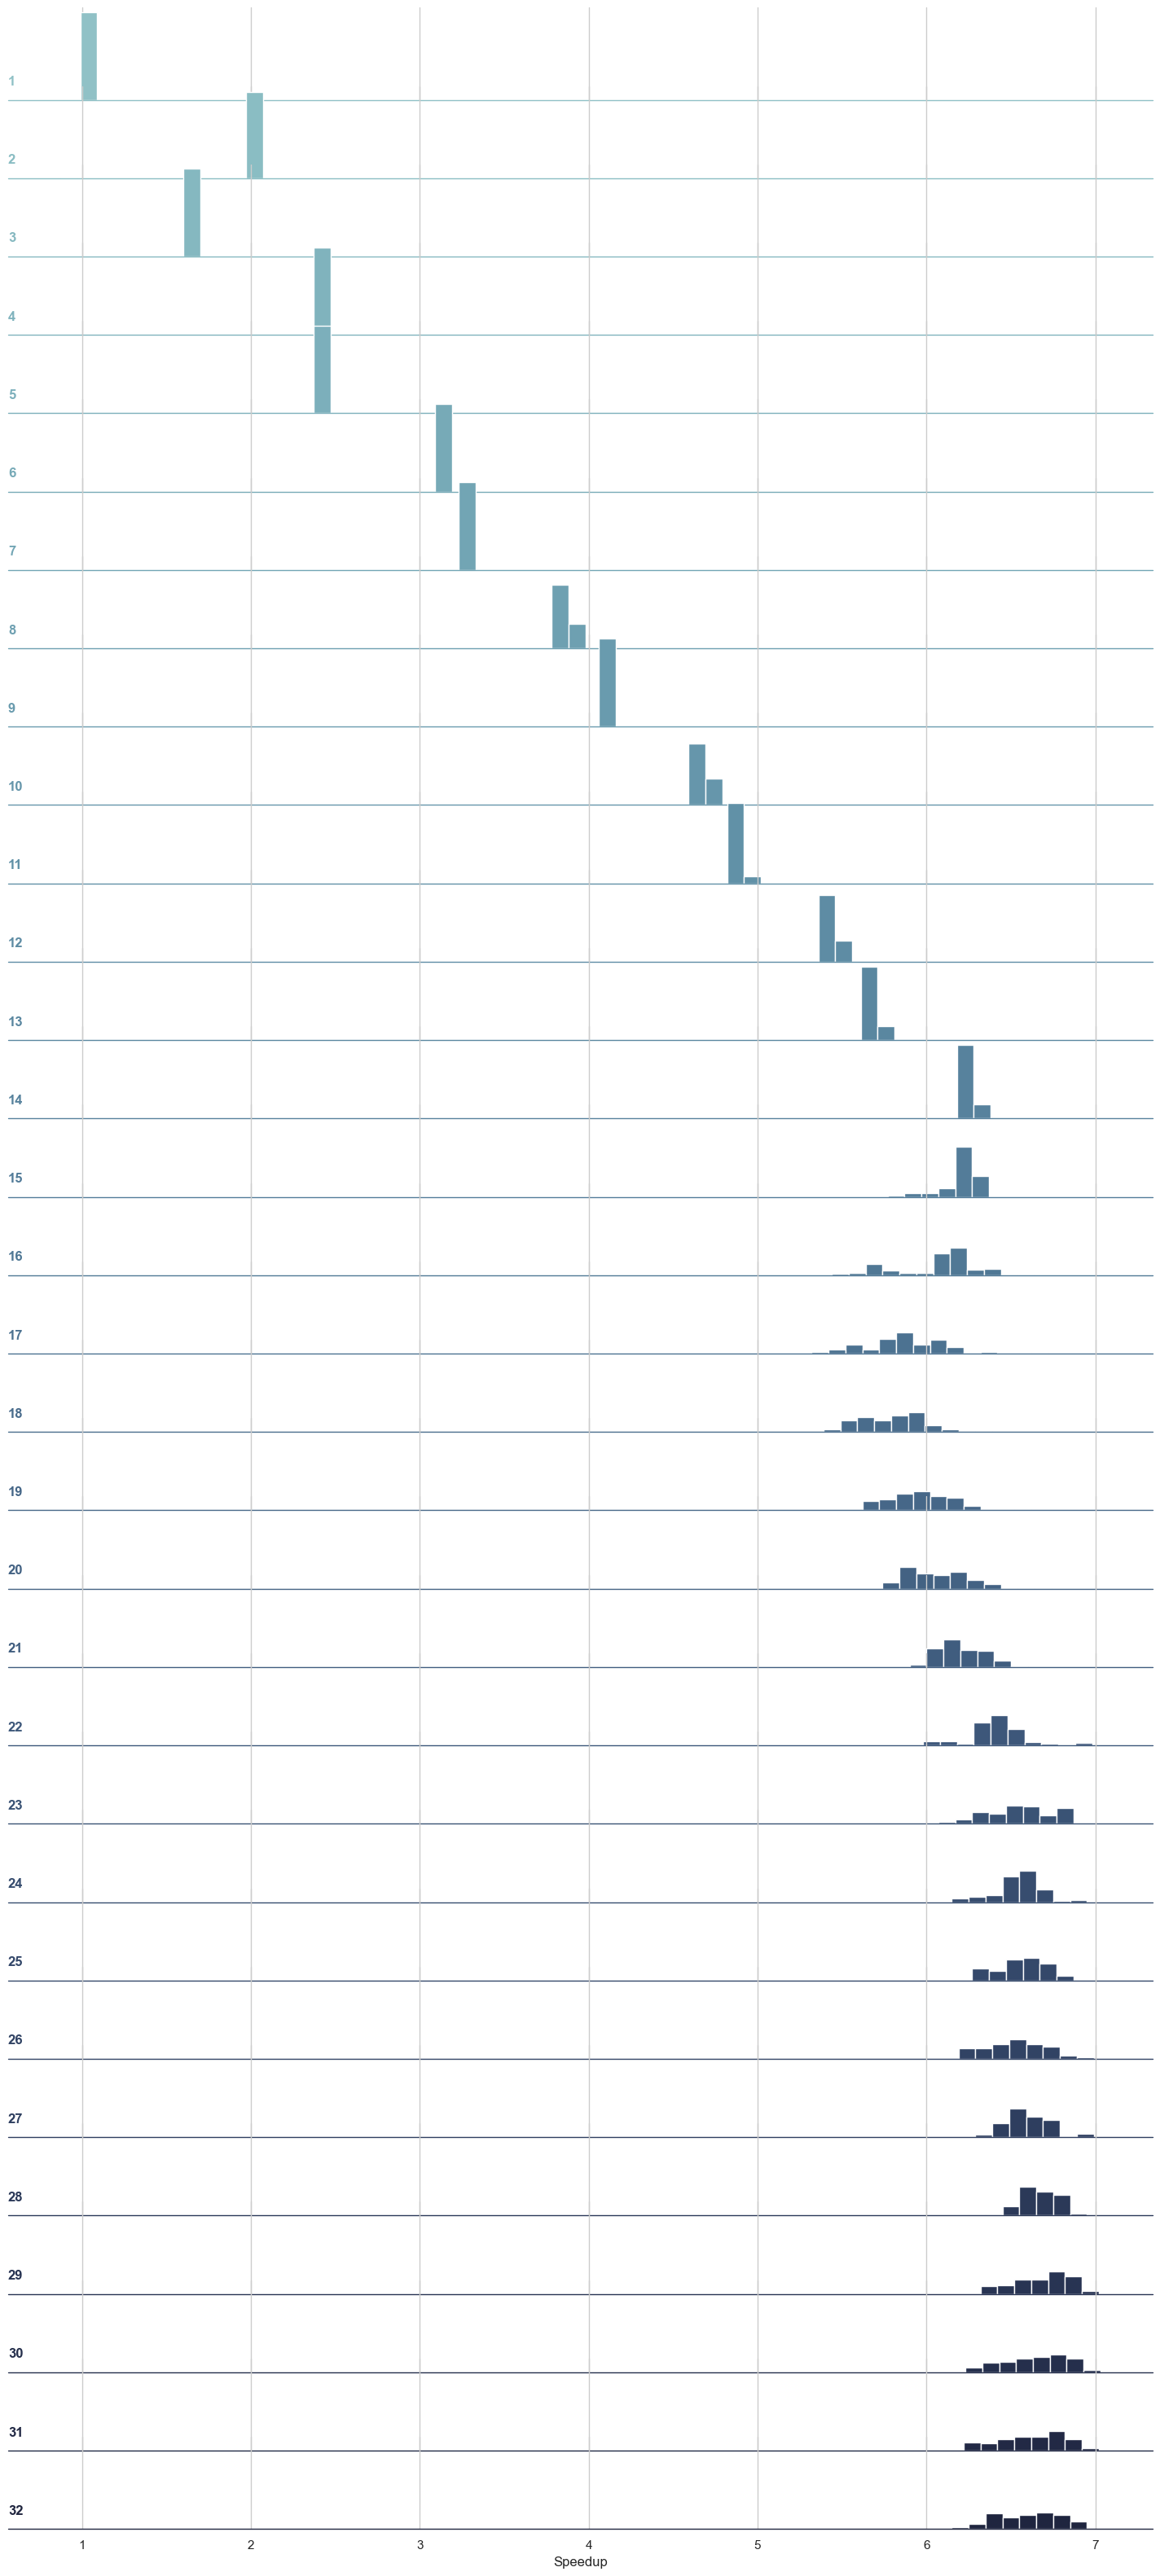

In [4]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0), "figure.figsize": (18, 12)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="nthreads", hue="nthreads", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.histplot, "speedup", clip_on=False, fill=True, alpha=1, binwidth=0.1)
# g.map(sns.histplot, "speedup", clip_on=False, color="w")

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)


g.map(label, "speedup")
g.set_xlabels("Speedup")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.15)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

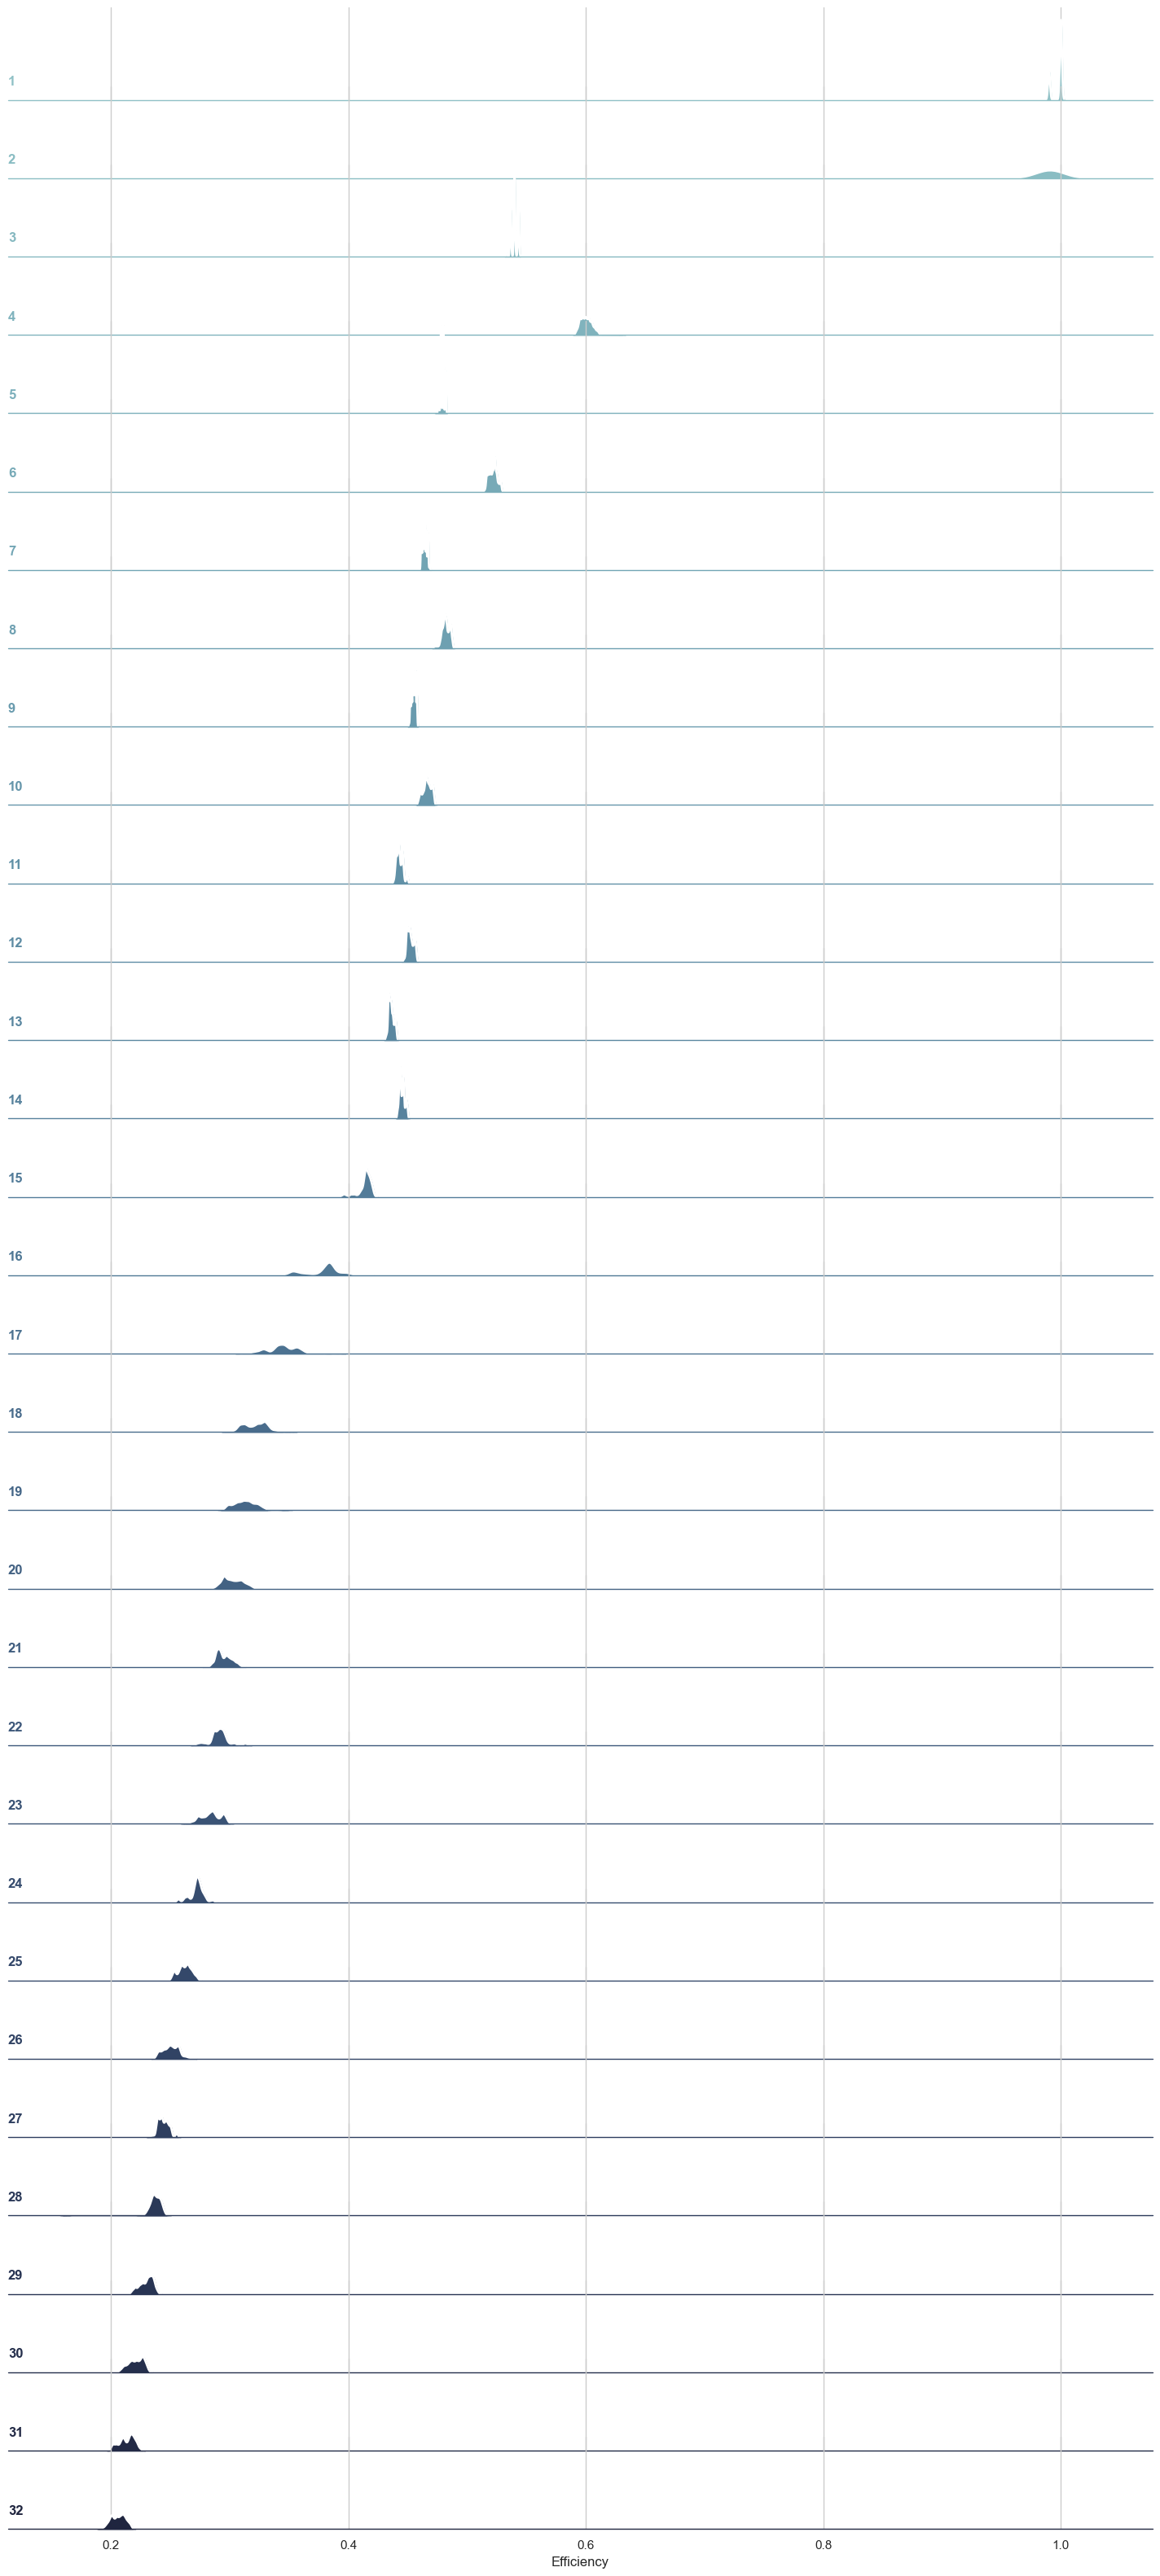

In [5]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0), "figure.figsize": (18, 12)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(32, rot=-.25, light=.7)
g = sns.FacetGrid(data, row="nthreads", hue="nthreads", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "efficiency", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1)
g.map(sns.kdeplot, "efficiency", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)


g.map(label, "efficiency")
g.set_xlabels("Efficiency")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.15)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [6]:
serial = data['serial'].mean()

df = data.groupby('nthreads').mean()
df

,serial,thread,speedup,efficiency
nthreads,,,,
1,373.68394,374.63419,0.9974,0.997400
2,384.47051,196.75832,1.9706,0.985300
3,383.67552,236.84561,1.6197,0.539900
4,371.50308,154.66803,2.4025,0.600625
5,377.70259,157.65840,2.3955,0.479100
6,385.47987,123.11690,3.1312,0.521867
7,384.64234,118.36790,3.2491,0.464157
8,384.87260,99.75460,3.8575,0.482187
9,373.77261,91.26269,4.0954,0.455044


Text(0.5, 0, 'Number of Threads')

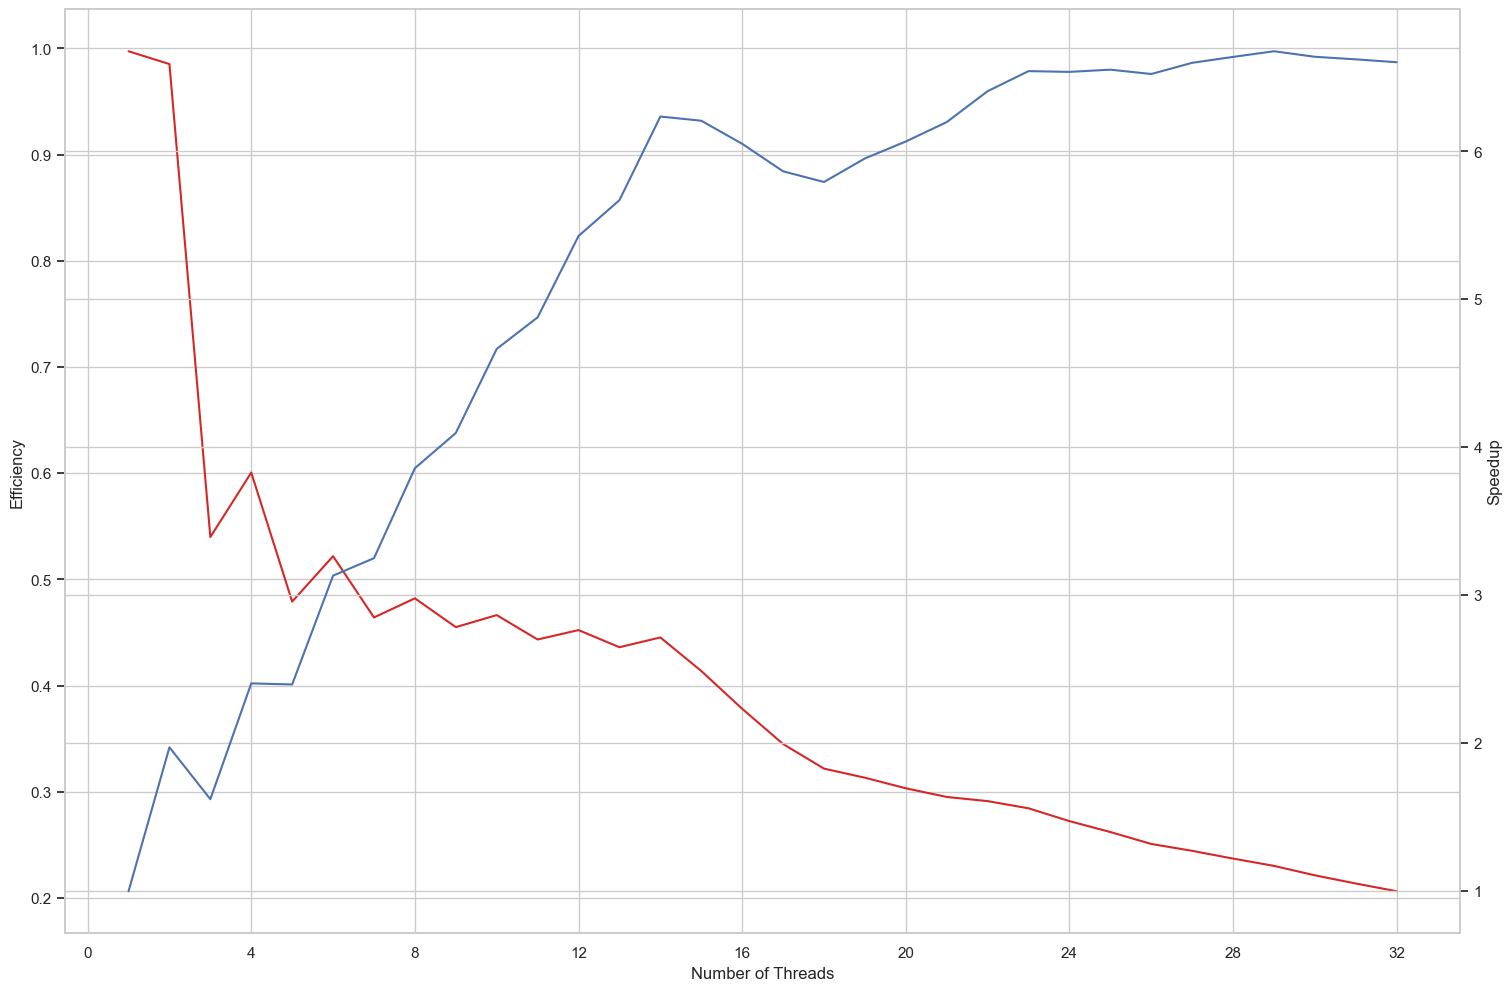

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df.index, df['efficiency'], color='tab:red')
ax2.plot(df.index, df['speedup'])

ax1.set_xticks([i for i in range(0, 32+1) if i % 4 == 0])
ax1.set_ylabel('Efficiency')
ax2.set_ylabel('Speedup')
ax1.set_xlabel('Number of Threads')